In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [12]:
df = pd.read_csv("./datosLimpios2022.csv")

In [3]:
df

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,cont_res,cont_nac,cont_prod,pais_prod,pais_res,pro_jefm,jef_migr,edad,precio_pasaje
0,Salida,Ecuatorianos,2022,4,20,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,América,ARGENTINA,ARGENTINA,PICHINCHA,1,23,800.90
1,Entrada,Ecuatorianos,2022,5,26,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,Europa,SUIZA SWITZERLAND,ECUADOR,PICHINCHA,1,68,1200.98
2,Salida,Ecuatorianos,2022,12,8,Hombre,ECUADOR,Vía Terrestre,Residencia,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,14,800.90
3,Salida,Ecuatorianos,2022,10,3,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,GUAYAS,12,71,800.90
4,Entrada,Ecuatorianos,2022,2,1,Mujer,ECUADOR,Vía Aérea,Residencia,Europa,América,Europa,ESPAÑA,ESPAÑA,PICHINCHA,1,38,1000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,Entrada,Ecuatorianos,2022,8,14,Mujer,ECUADOR,Vía Terrestre,Residencia,América,América,América,PERU PERU,ECUADOR,EL ORO,9,15,800.90
9931,Salida,Ecuatorianos,2022,11,4,Mujer,ECUADOR,Vía Terrestre,Turismo,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,60,800.90
9932,Salida,Ecuatorianos,2022,5,6,Mujer,ECUADOR,Vía Aérea,Turismo,América,América,América,MEXICO MEXICO,ECUADOR,PICHINCHA,1,30,800.90
9933,Salida,Ecuatorianos,2022,12,20,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,PICHINCHA,1,71,800.90


In [16]:
#True si entran al pais false si salen
df['tip_movi'] = df['tip_movi'].map({'Entrada': True, 'Salida': False})

In [17]:
df

,precio_pasaje,edad,mes_movi,tip_movi
0,800.90,23,4,False
1,1200.98,68,5,True
2,800.90,14,12,False
3,800.90,71,10,False
4,1000.00,38,2,True
...,...,...,...,...
9930,800.90,15,8,True
9931,800.90,60,11,False
9932,800.90,30,5,False
9933,800.90,71,12,False


In [18]:
df= df.loc[:,["precio_pasaje","edad", "mes_movi","tip_movi"]]

In [19]:
df.corr()

,precio_pasaje,edad,mes_movi,tip_movi
precio_pasaje,1.000000,0.044926,0.003550,0.006646
edad,0.044926,1.000000,0.000767,0.054293
mes_movi,0.003550,0.000767,1.000000,0.006992
tip_movi,0.006646,0.054293,0.006992,1.000000


In [20]:
df.corr(method="spearman")

,precio_pasaje,edad,mes_movi,tip_movi
precio_pasaje,1.000000,0.047631,-0.022718,0.028766
edad,0.047631,1.000000,0.000194,0.055546
mes_movi,-0.022718,0.000194,1.000000,0.009393
tip_movi,0.028766,0.055546,0.009393,1.000000


In [22]:
stats.pearsonr(df["precio_pasaje"],df["edad"])

PearsonRResult(statistic=0.044926183679074985, pvalue=7.475086934671163e-06)

In [23]:
stats.spearmanr(df["precio_pasaje"],df["edad"])

SignificanceResult(statistic=0.04763091690748007, pvalue=2.0373399154151694e-06)

C:\Users\damia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


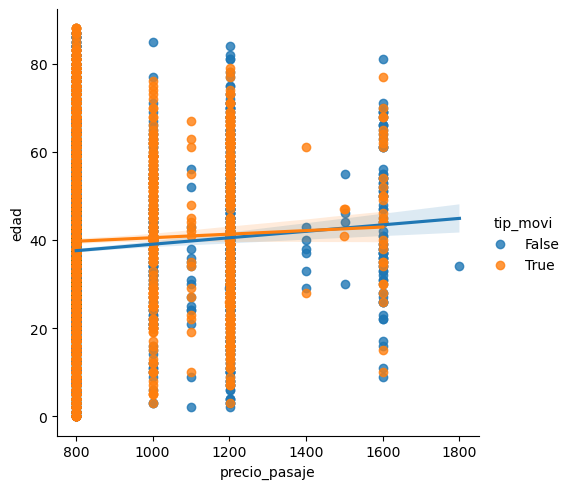

In [25]:
sns.lmplot(x="precio_pasaje", y="edad", hue="tip_movi",data = df)

C:\Users\damia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


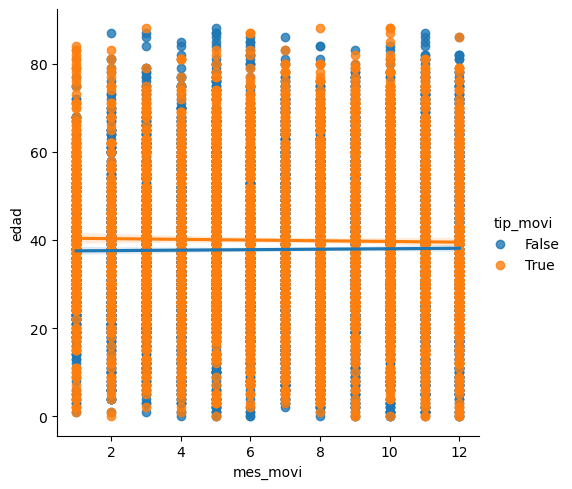

In [26]:
sns.lmplot(x="mes_movi", y="edad", hue="tip_movi",data = df)

C:\Users\damia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


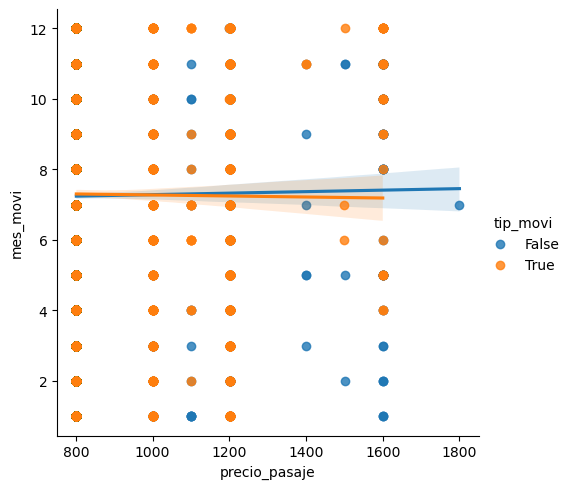

In [28]:
sns.lmplot(y="mes_movi", x="precio_pasaje", hue="tip_movi",data = df)

In [29]:
df[["no","yes"]] = pd.get_dummies(df["tip_movi"])

In [30]:
df

,precio_pasaje,edad,mes_movi,tip_movi,no,yes
0,800.90,23,4,False,True,False
1,1200.98,68,5,True,False,True
2,800.90,14,12,False,True,False
3,800.90,71,10,False,True,False
4,1000.00,38,2,True,False,True
...,...,...,...,...,...,...
9930,800.90,15,8,True,False,True
9931,800.90,60,11,False,True,False
9932,800.90,30,5,False,True,False
9933,800.90,71,12,False,True,False


In [144]:
X=df.loc[:,["precio_pasaje" ,"tip_movi"]]
y=df["edad"]

In [145]:
X

,precio_pasaje,tip_movi
0,800.90,False
1,1200.98,True
2,800.90,False
3,800.90,False
4,1000.00,True
...,...,...
9930,800.90,True
9931,800.90,False
9932,800.90,False
9933,800.90,False


In [146]:
y

0       23
1       68
2       14
3       71
4       38
        ..
9930    15
9931    60
9932    30
9933    71
9934    31
Name: edad, Length: 9935, dtype: int64

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [161]:
X_train

,precio_pasaje,tip_movi
6726,800.9,False
5807,800.9,False
4942,800.9,True
9925,800.9,False
7706,800.9,False
...,...,...
5734,800.9,False
5191,1000.0,True
5390,800.9,False
860,800.9,True


In [162]:
model = LinearRegression()

In [163]:
model.fit(X_train,y_train)

LinearRegression()

In [164]:
model.coef_

array([0.00460014, 1.84539962])

In [165]:
model.intercept_

34.09956037406553

In [166]:
y_pred = model.predict(X_test)

In [167]:
y_pred

array([39.62921511, 39.62921511, 39.62921511, ..., 37.78381549,
       37.78381549, 39.62921511])

In [168]:
y_test

9064    21
8535    27
1595     6
3333     9
3852    30
        ..
7521    46
6428    30
810     77
5920    23
6395    36
Name: edad, Length: 1987, dtype: int64

In [169]:
mean_absolute_error(y_pred,y_test)

14.951205229137065

In [170]:
mean_squared_error(y_pred,y_test)

337.29688182090047

In [171]:
np.sqrt(mean_squared_error(y_pred,y_test))

18.365644062240246

In [172]:
r2_score(y_test,y_pred)

0.008649670434154988